# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Sushobhan
[nltk_data]     Parajuli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\Sushobhan
[nltk_data]     Parajuli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sushobhan
[nltk_data]     Parajuli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)

(11314, 4)


In [3]:
# 3. Inspect / remove nulls and duplicates
print(df.isnull().sum())

id                0
message           0
topic             0
topic_category    0
dtype: int64


In [4]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [5]:
# 1. Make a function that makes all text lowercase.
test_string = 'This is A SENTENCE with LOTS OF CAPS.'
def make_lower(a_string):
    return a_string.lower()
make_lower(test_string)

'this is a sentence with lots of caps.'

In [6]:
# 2. Make a function that removes all punctuation. 
def remove_punctuation(a_string):
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [7]:
# 3. Make a function that removes all stopwords.
def remove_stopwords(a_string):
    #break the sentence into a list of words
    words = word_tokenize(a_string)
    #make a list to append valid words into
    valid_words = []
    #loop through all the words
    for word in words:
        if word not in stopwords:
            valid_words.append(word)
    a_string = ' '.join(valid_words)
    return a_string

test_string = 'This is a sentence! With some different stopwords i have added in here.'
remove_stopwords(test_string)

'This sentence ! With different stopwords added .'

In [10]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 
def stem_words(a_string):
    #initialize our stemmer
    porter = PorterStemmer()
    #break the sentence down into a list of words
    words = word_tokenize(a_string)
    #make a list to append valid words into
    valid_words = []
    #loop throug all the words
    for word in words:
        #stem the word
        stemmed_word = porter.stem(word)
        #append stemmed word to the valid_words
        valid_words.append(stemmed_word)
    #join the list of words together into a string
    a_string = ' '.join(valid_words)
    return a_string
test_string = 'I played and started playing with players and we all love to play with plays'
stem_words(test_string)

'i play and start play with player and we all love to play with play'

In [13]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    input_string = remove_stopwords(input_string)
    input_string = stem_words(input_string)
    return input_string
test_string = 'I played and started playing with players and we all love to play with plays'
text_pipeline(test_string)

'play start play player love play play'

In [15]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message'].apply(text_pipeline)
print("ORIGINAL TEXT\n:", df['message'][0])
print("CLEANED TEXT\n:", df['message_clean'][0])

ORIGINAL TEXT
: From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





CLEANED TEXT
: lerxstwamumdedu where thing subject car nntppostinghost rac3wamumdedu organ univers maryland colleg park line 15 wonder anyon could enlighten car saw day 2door sport car look late 60 earli 70 call bricklin door realli small addit front bumper sepa

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [16]:
df.head()

,id,message,topic,topic_category,message_clean
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu where thing subject car nntppo...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thoma e willi subject pb...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamb joe green subject weitek p9000 organ...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowel subject ...


In [23]:
# 1. define `X` and `y` data. 

X = df['message_clean'].values

y = df['topic_category'].values

In [24]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
from sklearn.feature_extraction.text import TfidfVectorizer
# initialize our vectorizer
vectorizer = TfidfVectorizer()

In [25]:
# 3. Fit our vectorizer using your X data
vectorizer.fit(X)

TfidfVectorizer()

In [26]:
# 4. Transform your X data using your fitted vectorizer. 
X = vectorizer.transform(X)

In [27]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X.shape,type(X))

(11314, 119708) <class 'scipy.sparse.csr.csr_matrix'>


# Split your data into Training and Testing data. 

In [28]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [29]:
# 1. Initalize an empty model. 
model = MultinomialNB(alpha=0.05)

In [30]:
# Fit our model with our training data.
model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [32]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)
# make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

In [33]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.912947


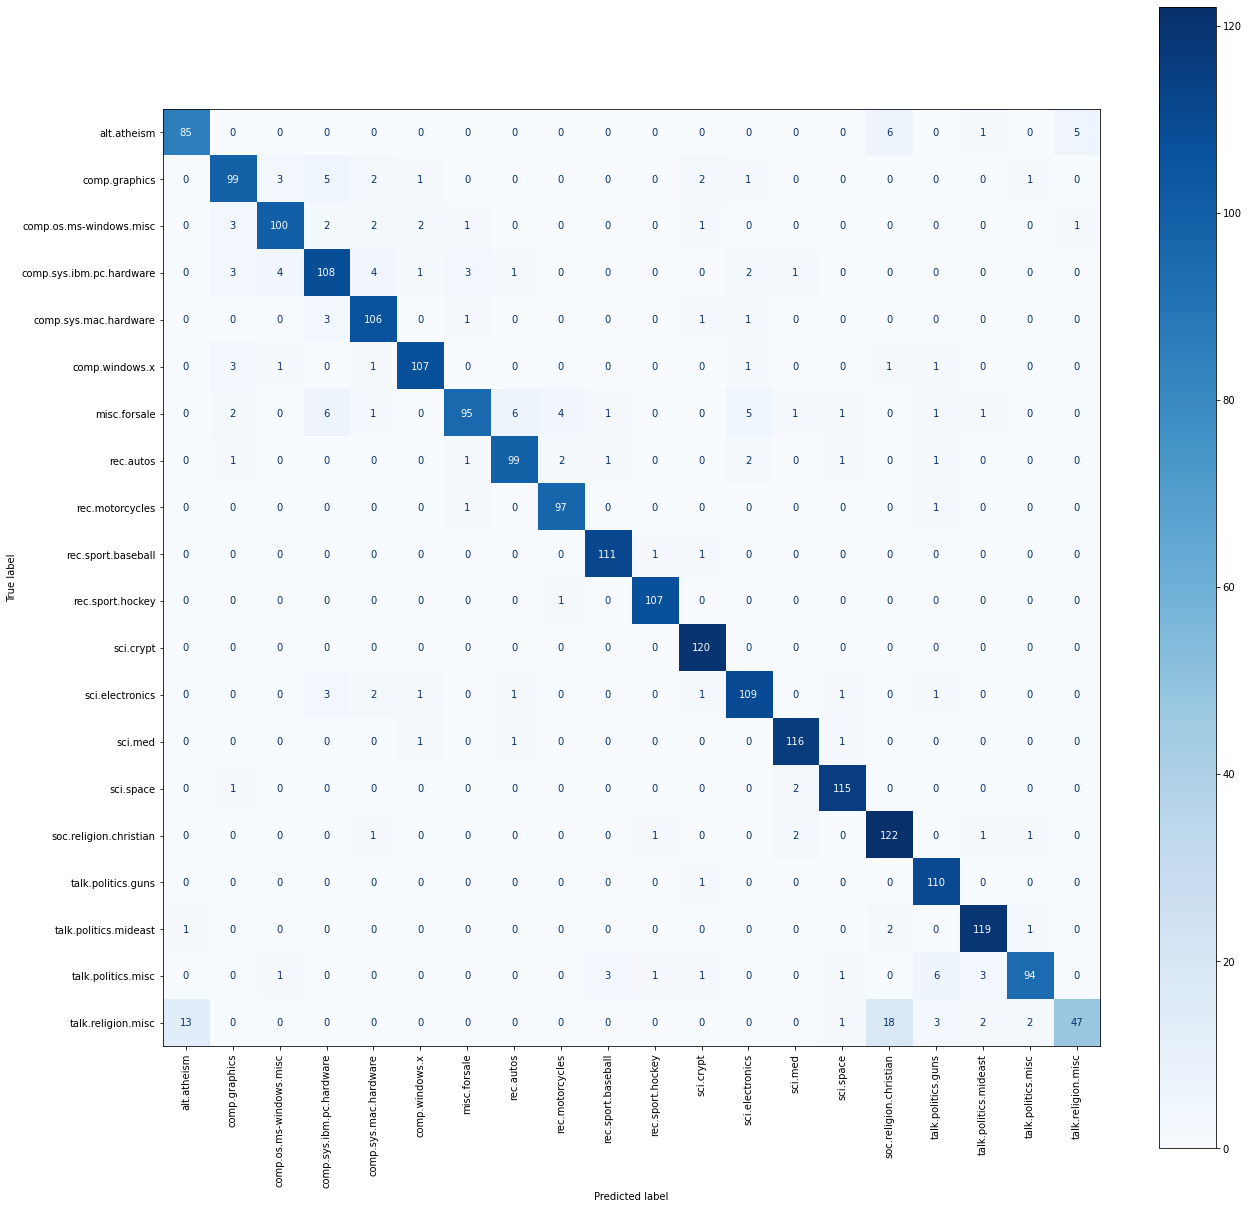

In [35]:
# 3. Plot the confusion matrix of our predictions
fig, ax =plt.subplots(figsize=(21,21))
disp = plot_confusion_matrix(model, X_test, y_test,display_labels=model.classes_,
                            cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [36]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
print(classification_report(y_test, y_pred, target_names = model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.86      0.88      0.87        97
           comp.graphics       0.88      0.87      0.88       114
 comp.os.ms-windows.misc       0.92      0.89      0.90       112
comp.sys.ibm.pc.hardware       0.85      0.85      0.85       127
   comp.sys.mac.hardware       0.89      0.95      0.92       112
          comp.windows.x       0.95      0.93      0.94       115
            misc.forsale       0.93      0.77      0.84       124
               rec.autos       0.92      0.92      0.92       108
         rec.motorcycles       0.93      0.98      0.96        99
      rec.sport.baseball       0.96      0.98      0.97       113
        rec.sport.hockey       0.97      0.99      0.98       108
               sci.crypt       0.94      1.00      0.97       120
         sci.electronics       0.90      0.92      0.91       119
                 sci.med       0.95      0.97      0.96       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [38]:
my_sentence = "What is the real problem with guns in the United States? You know many people through history have used guns for good and bad things but recently a surprising number of people think that banning guns is a good idea."

# 1. Apply the text pipeline to our sentence
new_text = text_pipeline(my_sentence)
# 2. Transform our cleaned text using the `X = vectorizer.transform([our_text])`\
new_text_vectorized = vectorizer.transform([new_text])
# 3. Use the model to predict our new `X`. 
model.predict(new_text_vectorized)
# 4. Print the prediction
pp = model.predict_proba(new_text_vectorized)
for c, p in zip(model.classes_, pp.round(3)[0]):
    print(c,p)

alt.atheism 0.01
comp.graphics 0.001
comp.os.ms-windows.misc 0.001
comp.sys.ibm.pc.hardware 0.001
comp.sys.mac.hardware 0.001
comp.windows.x 0.0
misc.forsale 0.002
rec.autos 0.03
rec.motorcycles 0.012
rec.sport.baseball 0.005
rec.sport.hockey 0.003
sci.crypt 0.048
sci.electronics 0.009
sci.med 0.007
sci.space 0.015
soc.religion.christian 0.011
talk.politics.guns 0.797
talk.politics.mideast 0.015
talk.politics.misc 0.028
talk.religion.misc 0.003


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

Because tweets are so small already, try not removing stopwords....

In [40]:
# 1. Load the dem-vs-rep-tweets data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
print(df.shape)
df.head()

(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [42]:
#check for null and duplicate values
print(df.isnull().sum())
print(df.duplicated().sum())

Party     0
Handle    0
Tweet     0
dtype: int64
57


In [45]:
#drop duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

In [47]:
#building text processing pipeline
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    input_string = stem_words(input_string)
    return input_string
df['cleaned_tweet'] = df['Tweet'].apply(text_pipeline)
print("ORIGINAL TEXT\n:", df['Tweet'][0])
print("CLEANED TEXT\n:", df['cleaned_tweet'][0])

ORIGINAL TEXT
: Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L
CLEANED TEXT
: today senat dem vote to savetheinternet proud to support similar netneutr legisl here in the hous httpstcon3tggdlu1l


In [48]:
df.head()

,Party,Handle,Tweet,cleaned_tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senat dem vote to savetheinternet proud ...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter haven resid alta vist...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto note that hurrican ...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolici meet with repdarrensoto thank ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurrican season start on june 1st...


In [57]:
#define X and y data
X = df['cleaned_tweet'].values
y = df['Party'].values

In [58]:
# initialze our vectorizer
vectorizer = TfidfVectorizer()

In [59]:
# make a vocab matrix
vectorizer.fit(X)

TfidfVectorizer()

In [60]:
# transform documents into vectors
X = vectorizer.transform(X)

In [61]:
print(X.shape,type(X))

(86403, 121192) <class 'scipy.sparse.csr.csr_matrix'>


In [64]:
# split the data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [69]:
# initialize our model
model = MultinomialNB(alpha=0.05)

# fit our model with our training data
model.fit(X_train, y_train)

# make new predictions of our testing data
y_pred = model.predict(X_test)

# make predicted probabilities of our testing data
y_pred_proba = model.predict_proba(X_test)

# evaluate our model
accuracy = model.score(X_test, y_test)

# print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.811759


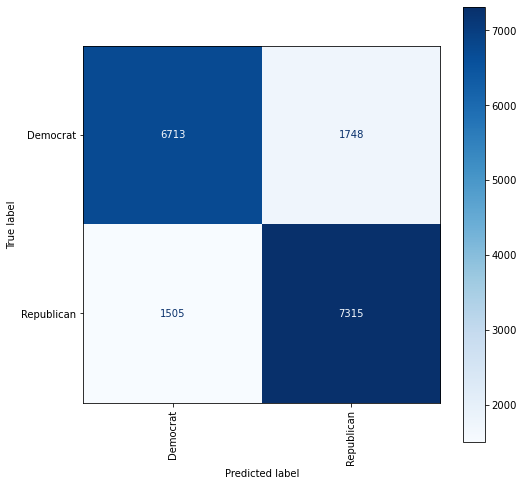

In [71]:
# 3. Plot the confusion matrix of our predictions
fig, ax =plt.subplots(figsize=(8,8))
disp = plot_confusion_matrix(model, X_test, y_test,display_labels=model.classes_,
                            cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [72]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
print(classification_report(y_test, y_pred, target_names = model.classes_))

              precision    recall  f1-score   support

    Democrat       0.82      0.79      0.80      8461
  Republican       0.81      0.83      0.82      8820

    accuracy                           0.81     17281
   macro avg       0.81      0.81      0.81     17281
weighted avg       0.81      0.81      0.81     17281



In [73]:
print("I could get f1-score of 81%")

I could get f1-score of 81%


In [84]:
my_sentence = "I am going to vote neither of the two parties."

# 1. Apply the text pipeline to our sentence
new_text = text_pipeline(my_sentence)
# 2. Transform our cleaned text using the `X = vectorizer.transform([our_text])`\
new_text_vectorized = vectorizer.transform([new_text])
# 3. Use the model to predict our new `X`. 
model.predict(new_text_vectorized)
# 4. Print the prediction
pp = model.predict_proba(new_text_vectorized)
for c, p in zip(model.classes_, pp.round(3)[0]):
    print(c,p)

Democrat 0.579
Republican 0.421
